In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\sahur\Downloads\DATASET OF DATA SCIENCE SRK SIR\StudentPerformanceFactors.csv")
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


**step -2 Data Understanding**

In [3]:
df.shape

(6607, 20)

In [4]:
df.size

132140

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

- Note:the dataset contains 6607 rows and 20 columns

In [6]:
(78/6607)*100,((6607-6517)/6607)*100,((6607-6540)/6607)*100

(1.1805660662933253, 1.362191614953837, 1.0140759800211896)

- There are some missing values present in the following features:

    - Teacher_Quality (78 missing values ,approximately 1.18% of the data ).

    - Parental_Education_Level(90 missing values,approximately 1.36% of the data ).

    - Distance_from_Home (67 missing values ,approximately 1.01% of the data ).

- the data consists of 7 numerical columns (int64) and 13 categorical columns(object)
   ,indicating a mix of quantitative and qualitative variables.

- All other features except the ones with missing values have consistant counts ,
  ,indicating no missing data for those columns

In [7]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [8]:
df.dtypes

Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object

In [9]:
continuous = ['Hours_Studied', 'Attendance', 'Sleep_Hours','Previous_Scores'
,'Exam_Score']
d_count = ['Tutoring_Sessions','Physical_Activity']
d_categorical = ['Parental_Involvement','Access_to_Resources', 'Extracurricular_Activities',
                 'Motivation_Level', 'Internet_Access','Family_Income', 'Teacher_Quality',
                 'School_Type','Peer_Influence','Learning_Disabilities','Parental_Education_Level',
                 'Distance_from_Home', 'Gender']

**step-3: Exploratoty Data Analysis**
- Describe

In [10]:
df[continuous].describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,67.235659
std,5.990594,11.547475,1.46812,14.399784,3.890456
min,1.000000,60.000000,4.00000,50.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,101.000000


- Note:
    - Hours_studied:the houes studied by students range from 1 to 44 hours per week,with an average of approximately 20 hours .
      The mean and median values are nearly equal ,indicating that the distribution of study hours is fairly balanced 
       and not skewed.

    - Attendendance: Student attendance ranges from a minimum of 60% to a maximum of 100% ,with an
      average attendance of around 80% .The mean and median values are close to each other ,suggesting
      that the attendance data follows a normal distribution.

    - Sleep_Hours:Students' sleep hours range from 4 to 10 hours per night ,with an average of 7
      hours,which is also the median value .this indicates that the sleep hours data is approximately
      normally distributed.

    - Previous_Scores:The previous exam scores range from 50 t0 100 ,with an average score of 75.This
      suggests that ,on average ,students perform well in their exams.

    - Exam_Score: The exam scores range from a minimum of 55 to a maximum of 101, with 101 being an invalid value.The presence of this incorrect data suggests a need for data cleaning to ensure accuracy   

In [11]:
df[d_count].describe()

,Tutoring_Sessions,Physical_Activity
count,6607.000000,6607.000000
mean,1.493719,2.967610
std,1.230570,1.031231
min,0.000000,0.000000
25%,1.000000,2.000000
50%,1.000000,3.000000
75%,2.000000,4.000000
max,8.000000,6.000000


**Unique and  Value_counts**

In [12]:
df['Parental_Involvement'].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [13]:
df['Parental_Involvement'].value_counts()

Parental_Involvement
Medium    3362
High      1908
Low       1337
Name: count, dtype: int64

- Note:
    - Parental_Involvements is a categorical features with three levels: Low,Medium , and High.
    - Among these ,the category Medium has the highest frequency count,indicating that most students fall under this level of parental involvement

In [14]:
df['Access_to_Resources'].unique()

array(['High', 'Medium', 'Low'], dtype=object)

In [15]:
df['Access_to_Resources'].value_counts()

Access_to_Resources
Medium    3319
High      1975
Low       1313
Name: count, dtype: int64

- Note:
    - Access_to_Resources is a categorical feature with three levels: Low ,Medium ,and High.
    - Among these ,the category Medium has the highest frequency count,indicating that most students fall under this level of success to resources.

In [16]:
df['Extracurricular_Activities'].unique()

array(['No', 'Yes'], dtype=object)

In [17]:
df['Extracurricular_Activities'].value_counts()

Extracurricular_Activities
Yes    3938
No     2669
Name: count, dtype: int64

- Note:
    - Extracurricular_Activities is a categorical feature with two categories :yes and No.
    - Among these ,the category Yes has the highest frequency count ,indicating that most students participate in extracurriculat activities.

In [18]:
df['Motivation_Level'].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [19]:
df['Motivation_Level'].value_counts()

Motivation_Level
Medium    3351
Low       1937
High      1319
Name: count, dtype: int64

- Note :
    - Motivation_Level is a categorical feature with three levels : Low ,Medium ,and High.
    - Among these ,the category Medium has the highest frequency count,indicating that most students have a medium level of motivation to study.

In [20]:
df['Internet_Access'].unique()

array(['Yes', 'No'], dtype=object)

In [21]:
df['Internet_Access'].value_counts()

Internet_Access
Yes    6108
No      499
Name: count, dtype: int64

- Note:
    - Internet_Access is a categorical feature with two categories:Yes and No.
    - Among these ,the category yes has the highest frequency count,indicating that most students have access to the internet.

In [22]:
df['Family_Income'].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [23]:
df['Family_Income'].value_counts()

Family_Income
Low       2672
Medium    2666
High      1269
Name: count, dtype: int64

- Note: 
    - Family_Income is a categorical feature with three level:Low ,Medium ,and High.
    - Among these ,the category Low has the highest frequency count,indicating that most students' parents have a low income .

In [24]:
df['Teacher_Quality'].unique()

array(['Medium', 'High', 'Low', nan], dtype=object)

In [25]:
df['Teacher_Quality'].value_counts()

Teacher_Quality
Medium    3925
High      1947
Low        657
Name: count, dtype: int64

- Note: 
    - Teacher_Quality is a categorical feature with three levels : Low ,Medium,and High.
    - This feature also contains Nan values , indicating the presence of missing data.
    - Among the available categories ,Medium has the highest Frequency count,suggesting that the quality of teachers turoring most students is medium.

In [26]:
df['School_Type'].unique()

array(['Public', 'Private'], dtype=object)

In [27]:
df['School_Type'].value_counts()

School_Type
Public     4598
Private    2009
Name: count, dtype: int64

- Note:
    - School_Type is a categorical feature representing the type of school :public and private.
    - Among these ,the category public has the highest frequency count,indicating that most students attend public schools.

In [28]:
df['Peer_Influence'].unique()

array(['Positive', 'Negative', 'Neutral'], dtype=object)

In [29]:
df['Peer_Influence'].value_counts()

Peer_Influence
Positive    2638
Neutral     2592
Negative    1377
Name: count, dtype: int64

- Note:
    - Peer_Influence is a categorical feature that indicates how students' friends influence them, with three categories:Positive ,Neutral,and Negative.
    - Among these ,the category positive has the highest frequency count,suggesting that peers have a positive impact on most students.

In [30]:
df['Learning_Disabilities'].unique()

array(['No', 'Yes'], dtype=object)

In [31]:
df['Learning_Disabilities'].value_counts()

Learning_Disabilities
No     5912
Yes     695
Name: count, dtype: int64

## text blank

In [32]:
df['Parental_Education_Level'].unique()

array(['High School', 'College', 'Postgraduate', nan], dtype=object)

In [33]:
df['Parental_Education_Level'].value_counts()

Parental_Education_Level
High School     3223
College         1989
Postgraduate    1305
Name: count, dtype: int64

In [34]:
df['Distance_from_Home'].unique()

array(['Near', 'Moderate', 'Far', nan], dtype=object)

In [35]:
df['Distance_from_Home'].value_counts()

Distance_from_Home
Near        3884
Moderate    1998
Far          658
Name: count, dtype: int64

In [36]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [37]:
df['Gender'].value_counts()

Gender
Male      3814
Female    2793
Name: count, dtype: int64

**Plots**

- Univariate Analysis

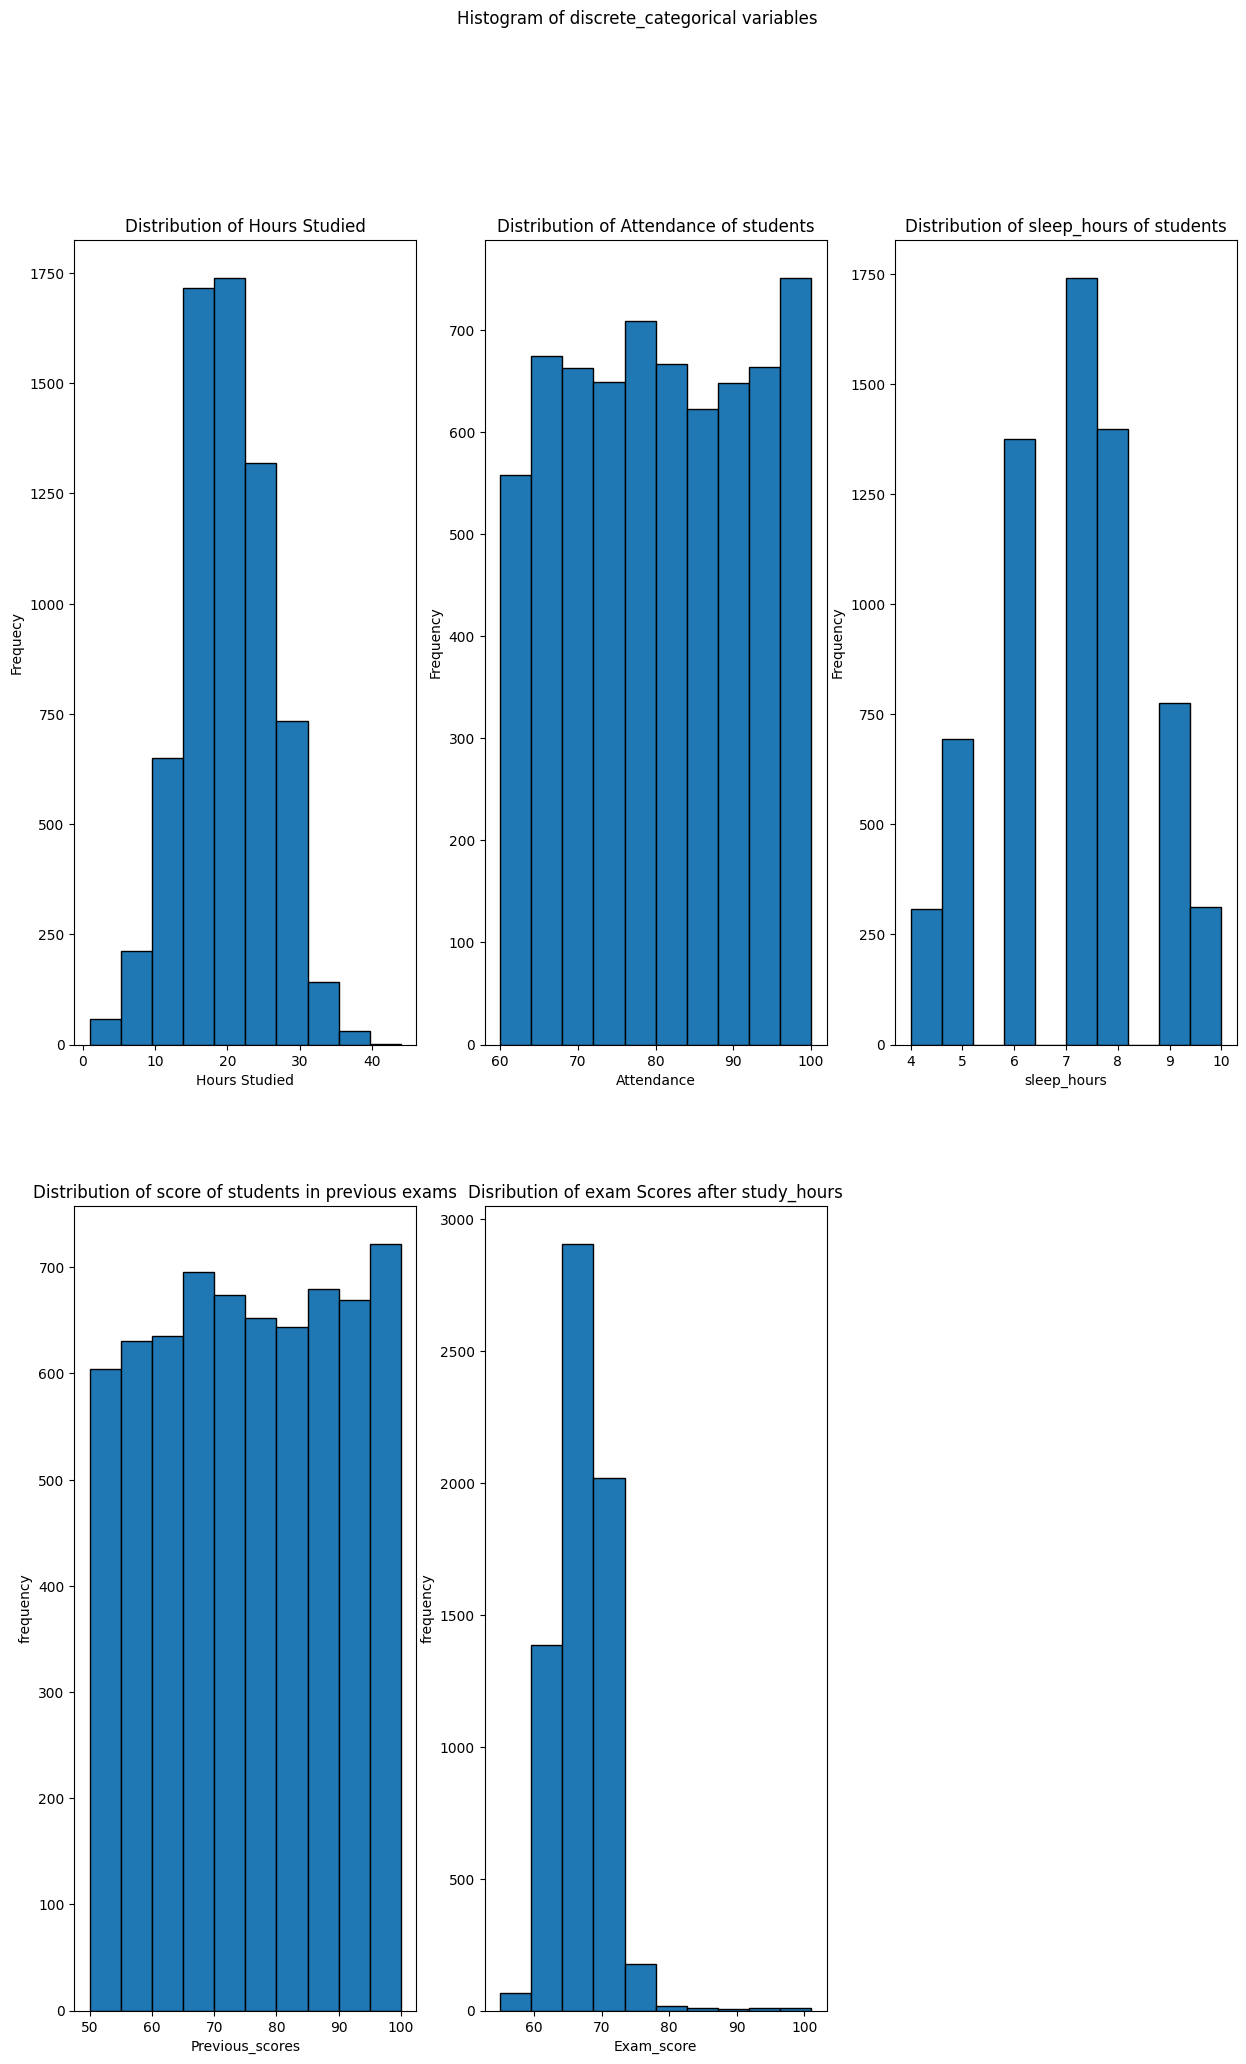

In [38]:
# continuous_variables 
plt.figure(figsize = (15,23))

plt.suptitle('Histogram of discrete_categorical variables')
# Histogram of all continuous variables
plt.subplot(2,3,1)
plt.hist(df['Hours_Studied'],edgecolor = 'black')
plt.title('Distribution of Hours Studied')
plt.xlabel('Hours Studied')
plt.ylabel('Frequecy')

plt.subplot(2,3,2)
plt.hist(df['Attendance'],edgecolor = 'black')
plt.title('Distribution of Attendance of students')
plt.xlabel('Attendance')
plt.ylabel('Frequency')

plt.subplot(2,3,3)
plt.hist(df['Sleep_Hours'],edgecolor = 'black')
plt.title('Distribution of sleep_hours of students')
plt.xlabel('sleep_hours')
plt.ylabel('Frequency')

plt.subplot(2,3,4)
plt.hist(df['Previous_Scores'],edgecolor = 'black')
plt.title('Distribution of score of students in previous exams')
plt.xlabel('Previous_scores')
plt.ylabel('frequency')

plt.subplot(2,3,5)
plt.hist(df['Exam_Score'],edgecolor = 'black')
plt.title('Disribution of exam Scores after study_hours')
plt.xlabel('Exam_score')
plt.ylabel('frequency')
plt.show()

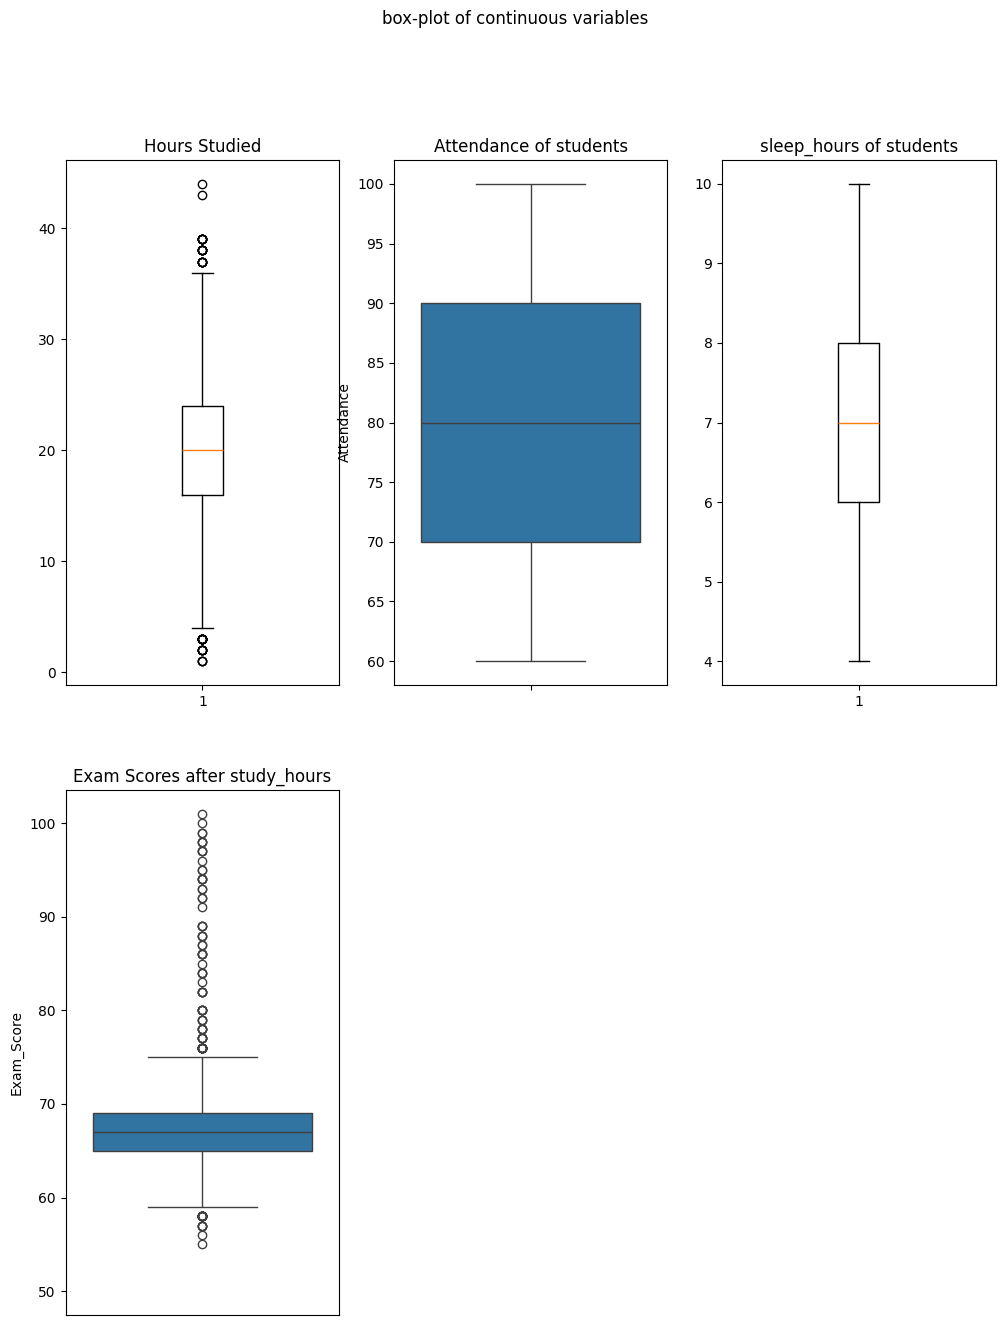

In [39]:
# Box-plots 
plt.figure(figsize = (12,15))
plt.suptitle('box-plot of continuous variables')

# Boxplot of all continous variables
plt.subplot(2,3,1)
plt.boxplot(df['Hours_Studied'])
plt.title('Hours Studied')

plt.subplot(2,3,2)
sns.boxplot(df['Attendance'])
plt.title('Attendance of students')

plt.subplot(2,3,3)
plt.boxplot(df['Sleep_Hours'])
plt.title('sleep_hours of students')

plt.subplot(2,3,4)
plt.boxplot(df['Previous_Scores'])
plt.title('Scores of students in previous exams')

plt.subplot(2,3,4)
sns.boxplot(df['Exam_Score'])
plt.title('Exam Scores after study_hours')
plt.show()



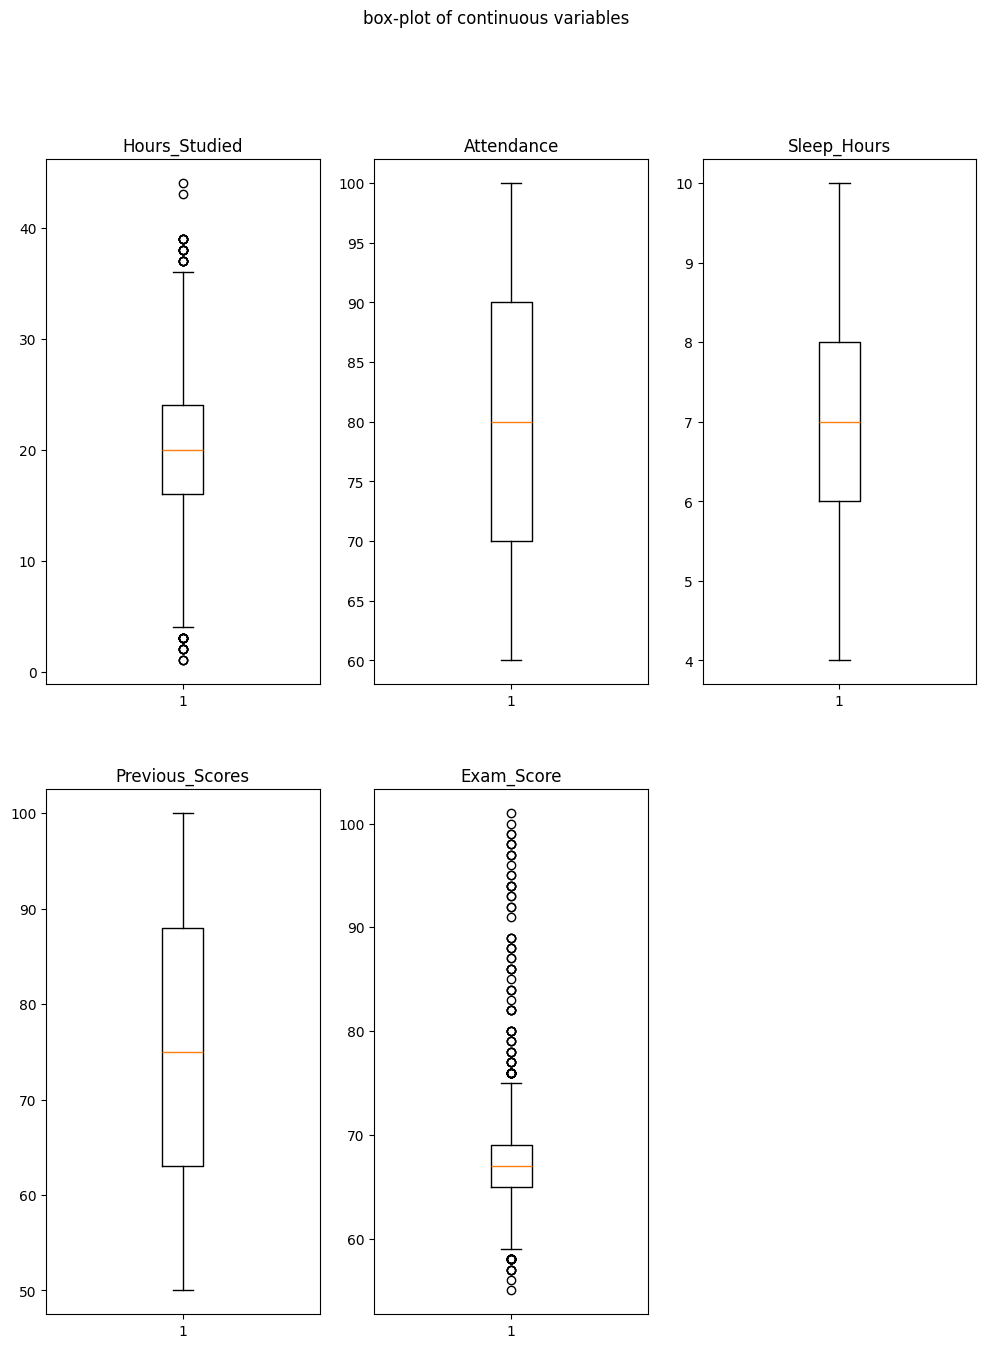

In [40]:
# by using for loop plot the box plot
 
# Box-plots 
plt.figure(figsize = (12,15))
plt.suptitle('box-plot of continuous variables')
j=1
for i in continuous:
# Boxplot of all continous variables
    
    plt.subplot(2,3,j)
    plt.boxplot(df[i])
    plt.title(i)
    j+=1

# plt.subplot(2,3,2)
# sns.boxplot(df['Attendance'])
# plt.title('Attendance of students')

# plt.subplot(2,3,3)
# plt.boxplot(df['Sleep_Hours'])
# plt.title('sleep_hours of students')

# plt.subplot(2,3,4)
# plt.boxplot(df['Previous_Scores'])
# plt.title('Scores of students in previous exams')

# plt.subplot(2,3,4)
# sns.boxplot(df['Exam_Score'])
# plt.title('Exam Scores after study_hours')
# plt.show()



- Note-
    - Here we can observe that there are outliers present in exam scores and hours studied

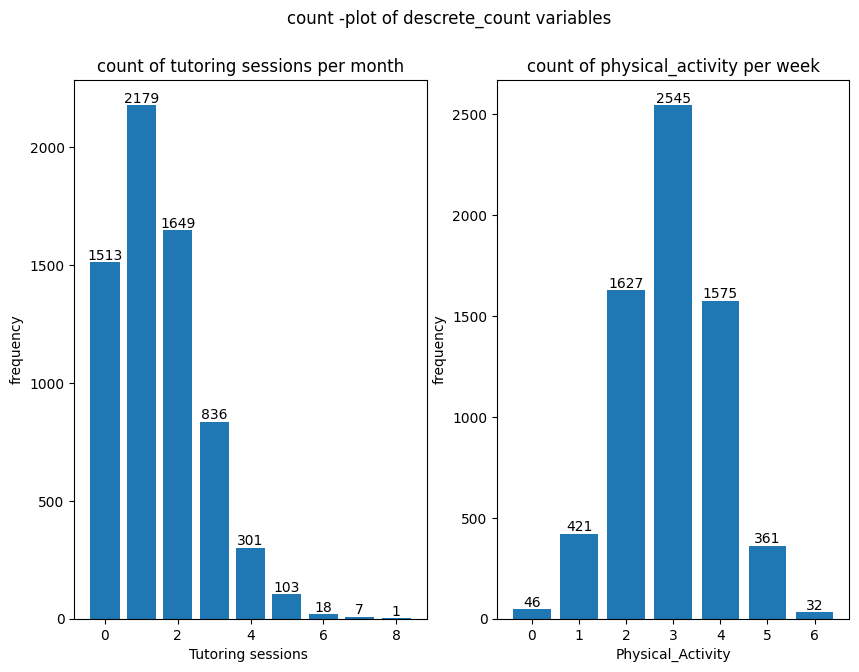

In [41]:
# discrete_count variables
d_count= ['Tutoring_Sessions','Physical_Activity']

plt.figure(figsize= (10,7))

plt.suptitle('count -plot of descrete_count variables')
plt.subplot(1,2,1)
patches =plt.bar(df['Tutoring_Sessions'].value_counts().index,df['Tutoring_Sessions'].value_counts())
plt.bar_label(patches)
plt.title('count of tutoring sessions per month')
plt.xlabel('Tutoring sessions ')
plt.ylabel('frequency')


plt.subplot(1,2,2)
patches =plt.bar(df['Physical_Activity'].value_counts().index,df['Physical_Activity'].value_counts())
plt.bar_label(patches)
plt.title('count of physical_activity per week')
plt.xlabel('Physical_Activity')
plt.ylabel('frequency')
plt.show()

In [42]:
# pie - chart 
df['Physical_Activity'].unique()

array([3, 4, 2, 1, 5, 0, 6], dtype=int64)

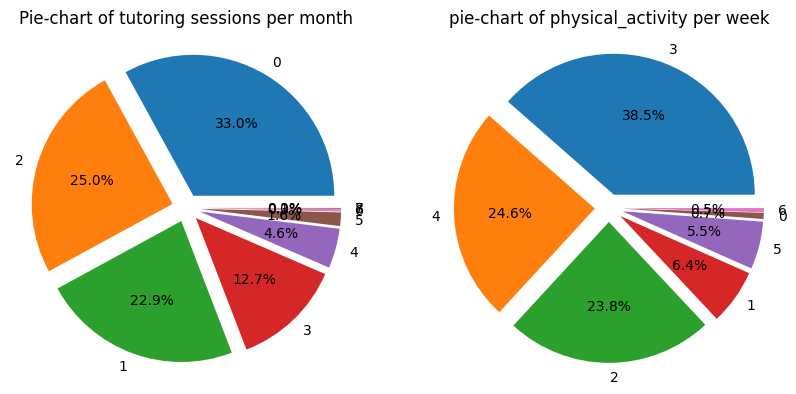

In [43]:
plt.figure(figsize=(10,20))
plt.subplot(1,2,1)
plt.pie(df['Tutoring_Sessions'].value_counts(),
        labels = df['Tutoring_Sessions'].unique(),
        autopct ="%0.1f%%",
       explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1])
plt.title('Pie-chart of tutoring sessions per month')

plt.subplot(1,2,2)
plt.pie(df['Physical_Activity'].value_counts(),
       labels = df['Physical_Activity'].unique(),
       autopct = '%0.1f%%',
       explode = [0.1,0.1,0.1,0.1,0.1,0.1,0.1])
plt.title('pie-chart of physical_activity per week')
plt.show()


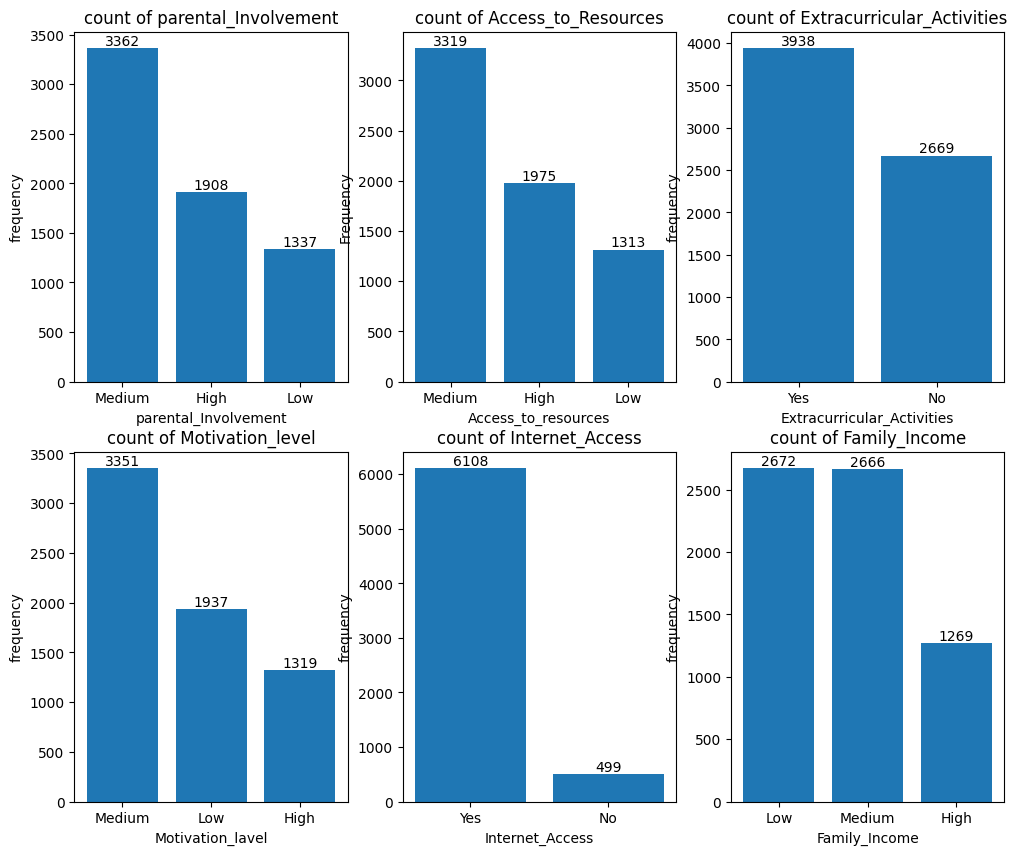

In [44]:
plt.figure(figsize = (12,10))
plt.subplot(2,3,1)
patches=plt.bar(df['Parental_Involvement'].value_counts().index,
                df['Parental_Involvement'].value_counts())
plt.bar_label(patches)
plt.title('count of parental_Involvement')
plt.xlabel('parental_Involvement')
plt.ylabel('frequency')

plt.subplot(2,3,2)
patches= plt.bar(df['Access_to_Resources'].value_counts().index,
                df['Access_to_Resources'].value_counts())
plt.bar_label(patches)
plt.title('count of Access_to_Resources')
plt.xlabel('Access_to_resources')
plt.ylabel('Frequency')

plt.subplot(2,3,3)
patches=plt.bar(df['Extracurricular_Activities'].value_counts().index,
               df['Extracurricular_Activities'].value_counts())
plt.bar_label(patches)
plt.title('count of Extracurricular_Activities')
plt.xlabel('Extracurricular_Activities')
plt.ylabel('frequency')

plt.subplot(2,3,4)
patches = plt.bar(df['Motivation_Level'].value_counts().index
                 ,df['Motivation_Level'].value_counts())
plt.bar_label(patches)
plt.title('count of Motivation_level')
plt.xlabel('Motivation_lavel')
plt.ylabel('frequency')

plt.subplot(2,3,5)
patches=plt.bar(df['Internet_Access'].value_counts().index,
               df['Internet_Access'].value_counts())
plt.bar_label(patches)
plt.title('count of Internet_Access')
plt.xlabel('Internet_Access')
plt.ylabel('frequency')

plt.subplot(2,3,6)
patches=plt.bar(df['Family_Income'].value_counts().index,
               df['Family_Income'].value_counts())
plt.bar_label(patches)
plt.title('count of Family_Income')
plt.xlabel('Family_Income')
plt.ylabel('frequency')

plt.show()

In [45]:
# pie - chart 
df['Family_Income'].unique()


array(['Low', 'Medium', 'High'], dtype=object)

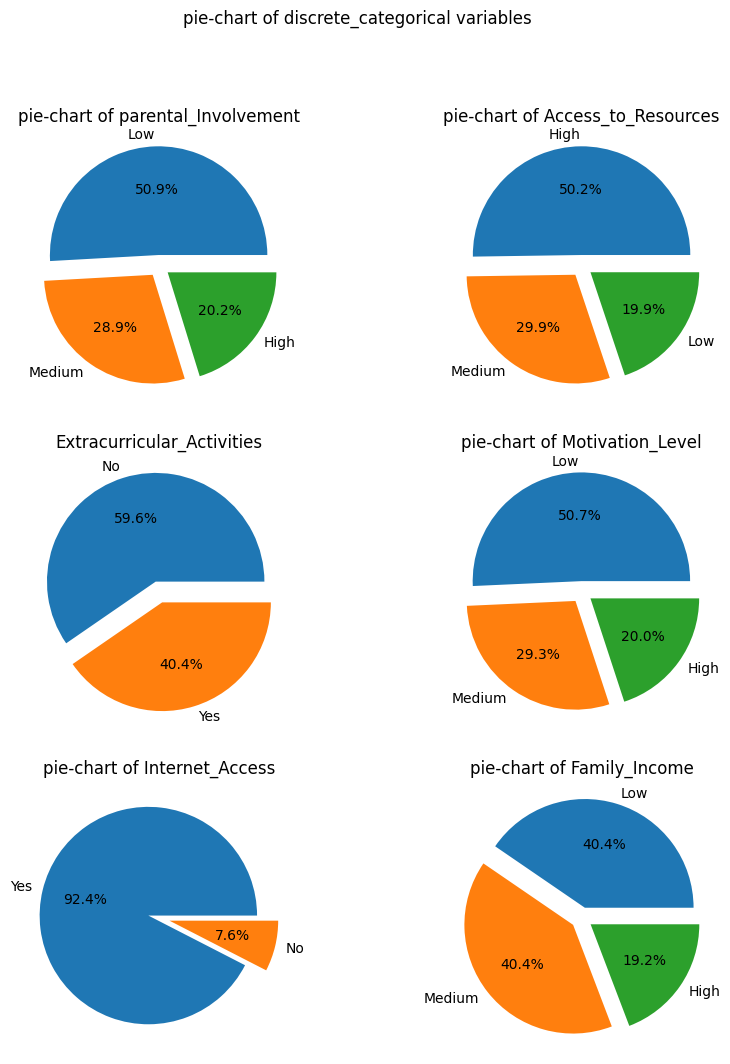

In [46]:
plt.figure(figsize=(10,12))

plt.suptitle('pie-chart of discrete_categorical variables')
plt.subplot(3,2,1)
plt.pie(df['Parental_Involvement'].value_counts(),
       labels = df['Parental_Involvement'].unique(),
       autopct = '%0.1f%%',
       explode = [0.1,0.1,0.1])
plt.title('pie-chart of parental_Involvement')

plt.subplot(3,2,2)
plt.pie(df['Access_to_Resources'].value_counts(),
       labels = df['Access_to_Resources'].unique(),
       autopct = '%0.1f%%',
       explode = [0.1,0.1,0.1])
plt.title('pie-chart of Access_to_Resources')

plt.subplot(3,2,3)
plt.pie(df['Extracurricular_Activities'].value_counts(),
       labels = df['Extracurricular_Activities'].unique(),
       autopct = '%0.1f%%',
       explode = [0.1,0.1])
plt.title('Extracurricular_Activities')

plt.subplot(3,2,4)
plt.pie(df['Motivation_Level'].value_counts(),
       labels = df['Motivation_Level'].unique(),
       autopct = '%0.1f%%',
       explode = [0.1,0.1,0.1])
plt.title('pie-chart of Motivation_Level')

plt.subplot(3,2,5)
plt.pie(df['Internet_Access'].value_counts(),
       labels = df['Internet_Access'].unique(),
       autopct = '%0.1f%%',
       explode = [0.1,0.1])
plt.title('pie-chart of Internet_Access')

plt.subplot(3,2,6)
plt.pie(df['Family_Income'].value_counts(),
       labels = df['Family_Income'].unique(),
       autopct = '%0.1f%%',
       explode = [0.1,0.1,0.1])
plt.title('pie-chart of Family_Income')

plt.show()

In [47]:
d_categorical

['Parental_Involvement',
 'Access_to_Resources',
 'Extracurricular_Activities',
 'Motivation_Level',
 'Internet_Access',
 'Family_Income',
 'Teacher_Quality',
 'School_Type',
 'Peer_Influence',
 'Learning_Disabilities',
 'Parental_Education_Level',
 'Distance_from_Home',
 'Gender']

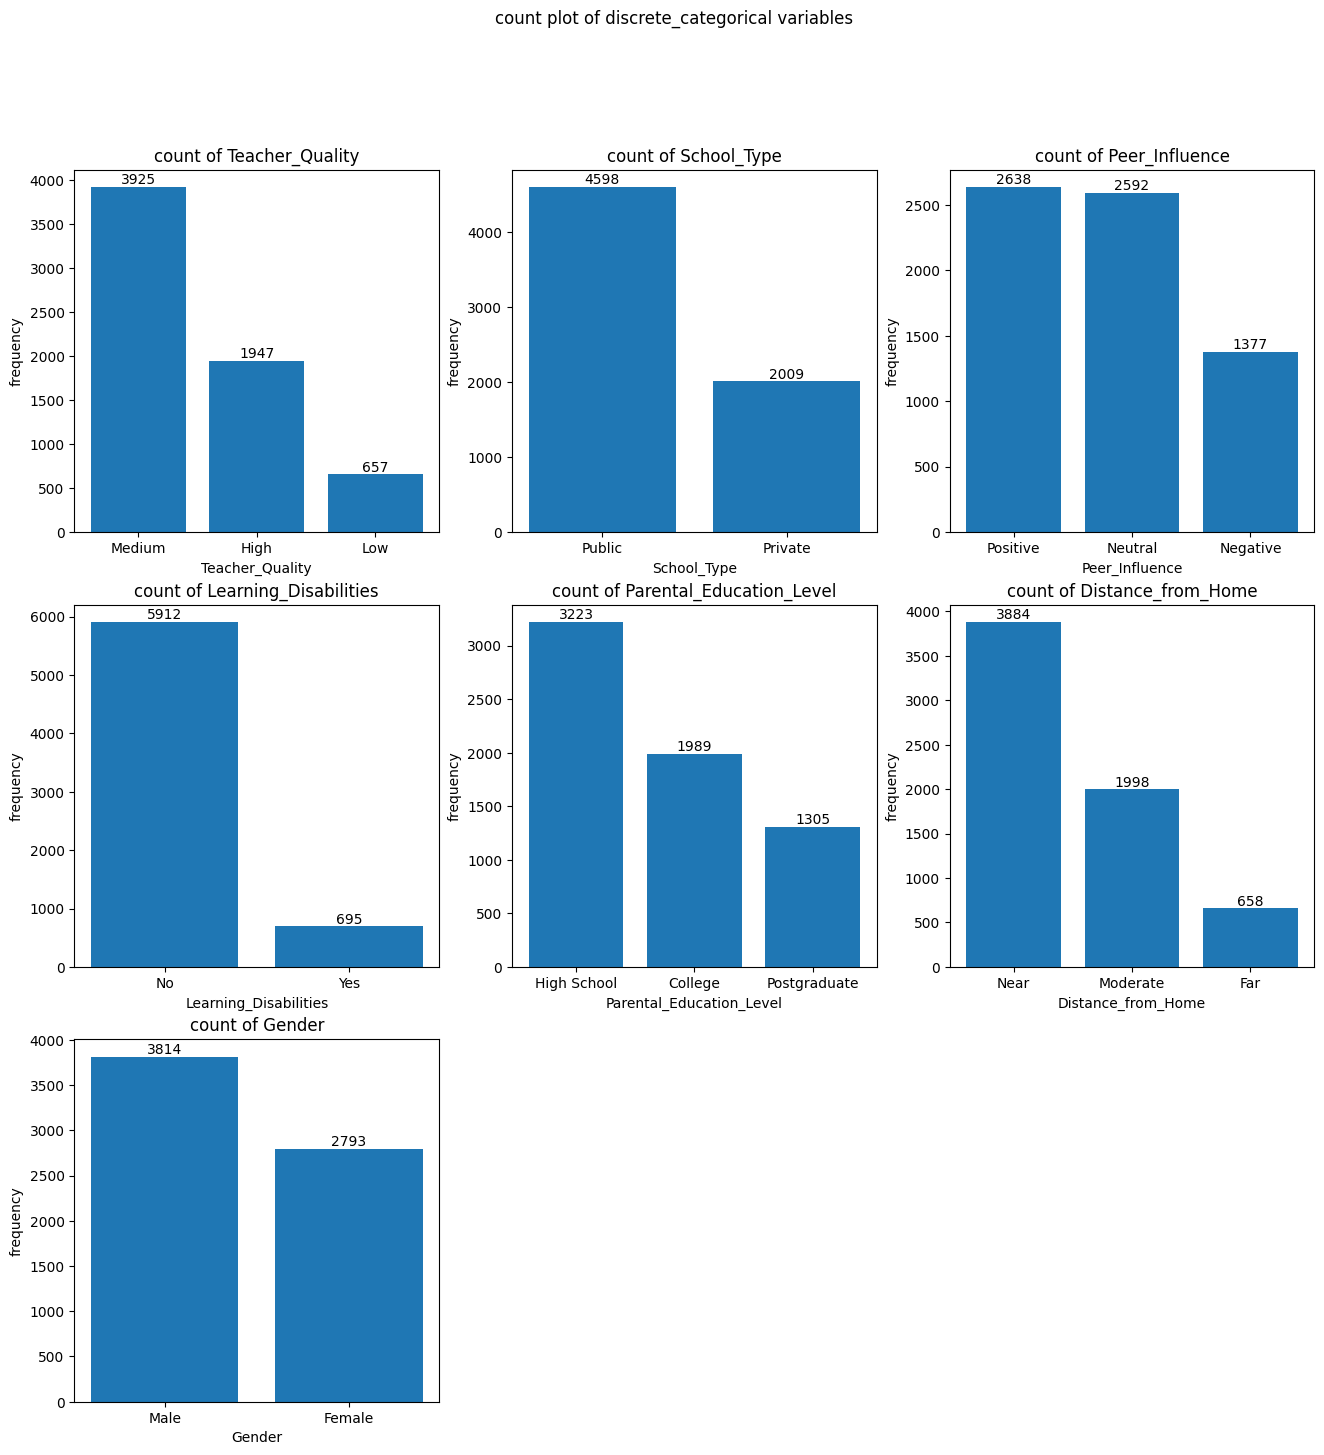

In [48]:
plt.figure(figsize=(16,16))

plt.suptitle('count plot of discrete_categorical variables')
plt.subplot(3,3,1)
patches = plt.bar(df['Teacher_Quality'].value_counts().index,
                 df['Teacher_Quality'].value_counts())
plt.bar_label(patches)
plt.title('count of Teacher_Quality')
plt.xlabel('Teacher_Quality')
plt.ylabel('frequency')

plt.subplot(3,3,2)
patches = plt.bar(df['School_Type'].value_counts().index,
                 df['School_Type'].value_counts())
plt.bar_label(patches)
plt.title('count of School_Type')
plt.xlabel('School_Type')
plt.ylabel('frequency')

plt.subplot(3,3,3)
patches = plt.bar(df['Peer_Influence'].value_counts().index,
                 df['Peer_Influence'].value_counts())
plt.bar_label(patches)
plt.title('count of Peer_Influence')
plt.xlabel('Peer_Influence')
plt.ylabel('frequency')

plt.subplot(3,3,4)
patches = plt.bar(df['Learning_Disabilities'].value_counts().index,
                 df['Learning_Disabilities'].value_counts())
plt.bar_label(patches)
plt.title('count of Learning_Disabilities')
plt.xlabel('Learning_Disabilities')
plt.ylabel('frequency')

plt.subplot(3,3,5)
patches = plt.bar(df['Parental_Education_Level'].value_counts().index,
                 df['Parental_Education_Level'].value_counts())
plt.bar_label(patches)
plt.title('count of Parental_Education_Level')
plt.xlabel('Parental_Education_Level')
plt.ylabel('frequency')

plt.subplot(3,3,6)
patches = plt.bar(df['Distance_from_Home'].value_counts().index,
                 df['Distance_from_Home'].value_counts())
plt.bar_label(patches)
plt.title('count of Distance_from_Home')
plt.xlabel('Distance_from_Home')
plt.ylabel('frequency')

plt.subplot(3,3,7)
patches = plt.bar(df['Gender'].value_counts().index,
                 df['Gender'].value_counts())
plt.bar_label(patches)
plt.title('count of Gender')
plt.xlabel('Gender')
plt.ylabel('frequency')

plt.show()

In [49]:
# pie_chart 
df['Learning_Disabilities'].unique()

array(['No', 'Yes'], dtype=object)

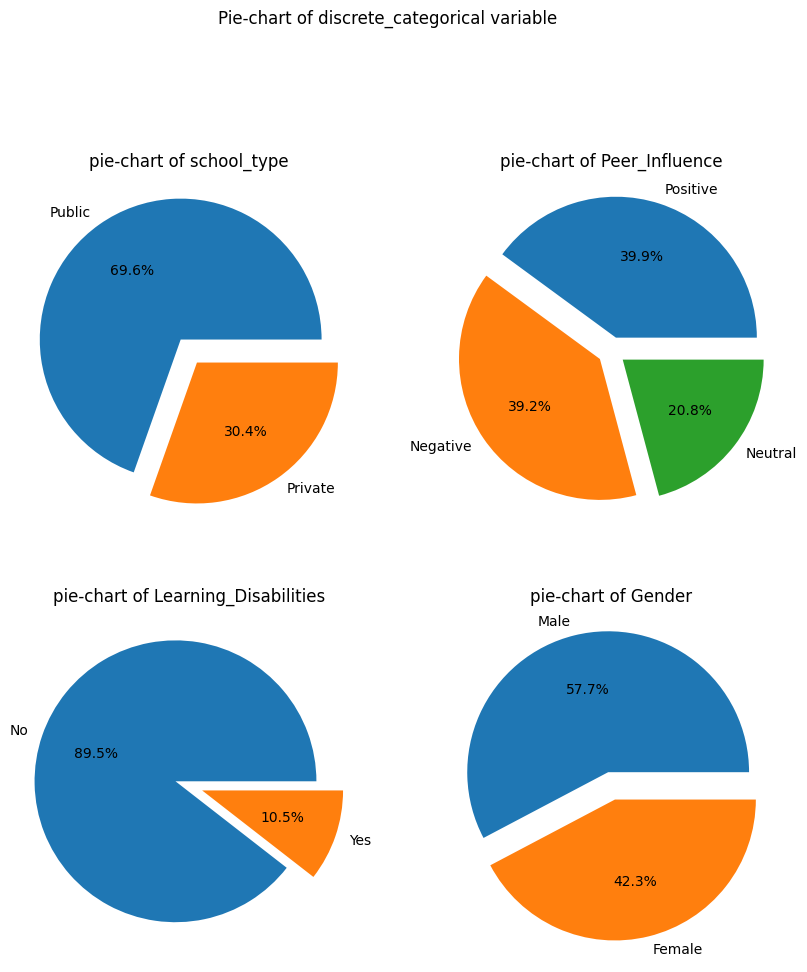

In [50]:
plt.figure(figsize=(10,16))
''' df['Teacher_Quality'],df['Parental_Education_level'],
df['Distance_from_Home']--- missing values are present so pie chart connot be ploted
'''

plt.suptitle('Pie-chart of discrete_categorical variable')

plt.subplot(3,2,1)
plt.pie(df['School_Type'].value_counts(),
       labels = df['School_Type'].unique(),autopct = '%0.1f%%'
       ,explode = [0.1,0.1])
plt.title('pie-chart of school_type')

plt.subplot(3,2,2)
plt.pie(df['Peer_Influence'].value_counts(),
       labels = df['Peer_Influence'].unique(),autopct = '%0.1f%%'
       ,explode = [0.1,0.1,0.1])
plt.title('pie-chart of Peer_Influence')

plt.subplot(3,2,3)
plt.pie(df['Learning_Disabilities'].value_counts(),
       labels = df['Learning_Disabilities'].unique(),autopct = '%0.1f%%'
       ,explode = [0.1,0.1])
plt.title('pie-chart of Learning_Disabilities')

plt.subplot(3,2,4)
plt.pie(df['Gender'].value_counts(),
       labels = df['Gender'].unique(),autopct = '%0.1f%%'
       ,explode = [0.1,0.1])
plt.title('pie-chart of Gender')

plt.show()

**Bivariate plots**

In [51]:
# scatter - plots
continuous

['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Exam_Score']

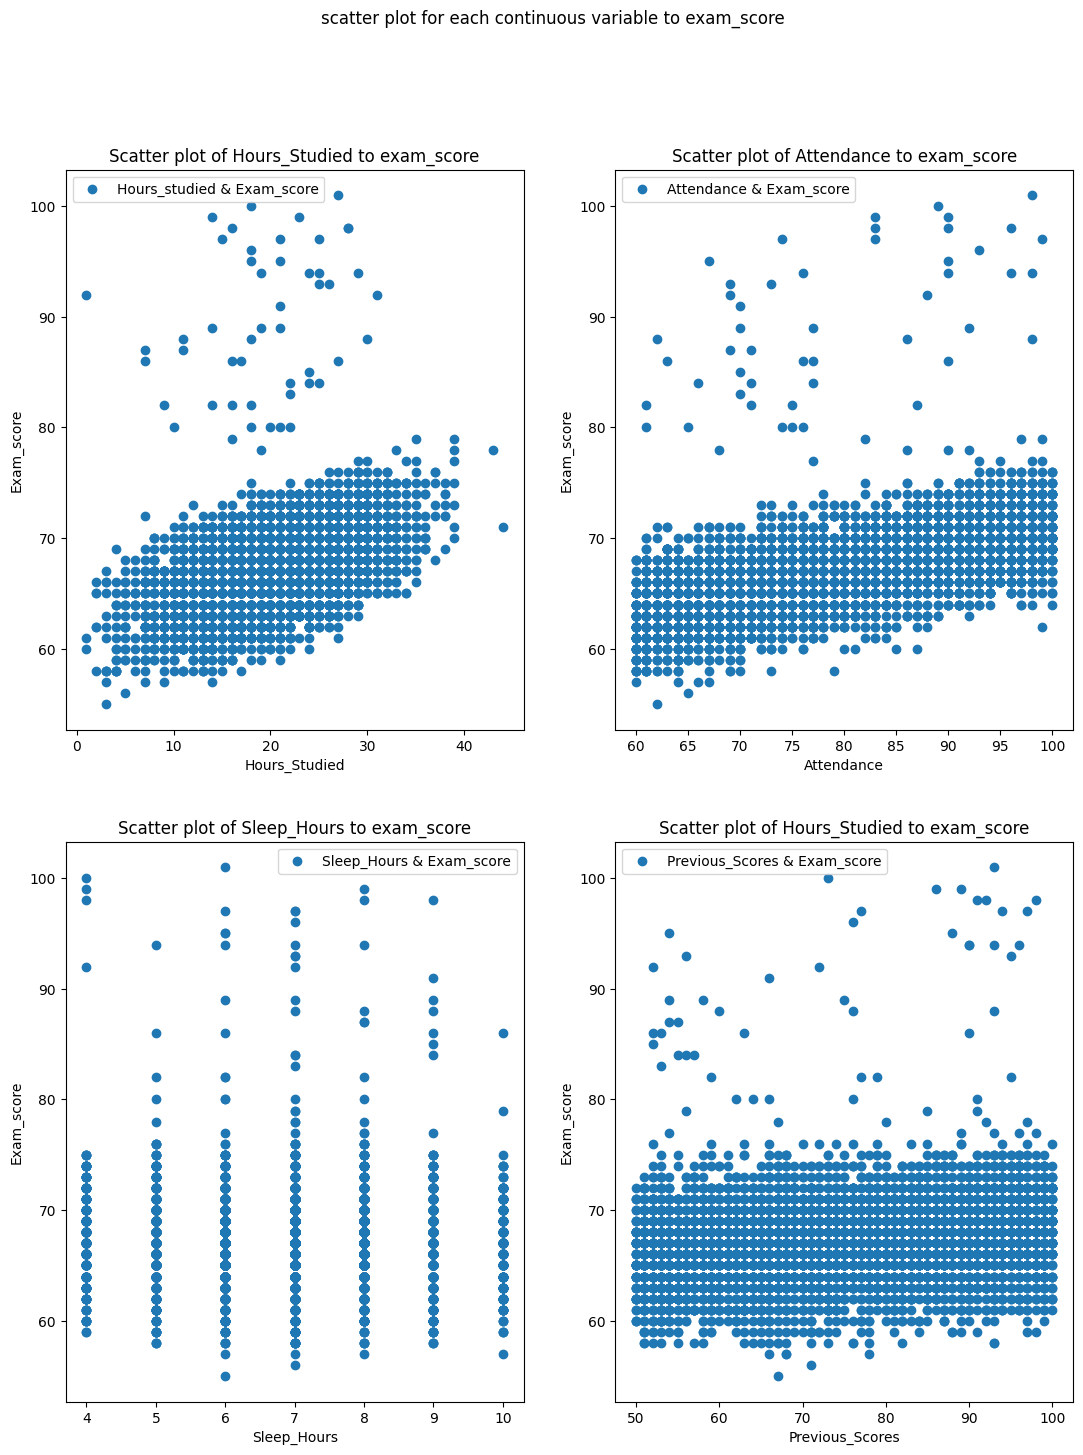

In [52]:
plt.figure(figsize=(13,16))

plt.suptitle('scatter plot for each continuous variable to exam_score')

plt.subplot(2,2,1)
plt.scatter(x=df['Hours_Studied'],y=df['Exam_Score'],label = 'Hours_studied & Exam_score')
plt.xlabel('Hours_Studied')
plt.ylabel('Exam_score')
plt.title('Scatter plot of Hours_Studied to exam_score')
plt.legend()

plt.subplot(2,2,2)
plt.scatter(x=df['Attendance'],y=df['Exam_Score'],label = 'Attendance & Exam_score')
plt.xlabel('Attendance')
plt.ylabel('Exam_score')
plt.title('Scatter plot of Attendance to exam_score')
plt.legend()

plt.subplot(2,2,3)
plt.scatter(x=df['Sleep_Hours'],y=df['Exam_Score'],label = 'Sleep_Hours & Exam_score')
plt.xlabel('Sleep_Hours')
plt.ylabel('Exam_score')
plt.title('Scatter plot of Sleep_Hours to exam_score')
plt.legend()

plt.subplot(2,2,4)
plt.scatter(x=df['Previous_Scores'],y=df['Exam_Score'],label = 'Previous_Scores & Exam_score')
plt.xlabel('Previous_Scores')
plt.ylabel('Exam_score')
plt.title('Scatter plot of Hours_Studied to exam_score')
plt.legend()
plt.show()

In [53]:
# correlation
df[continuous].corr()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Exam_Score
Hours_Studied,1.000000,-0.009908,0.010977,0.024846,0.445455
Attendance,-0.009908,1.000000,-0.015918,-0.020186,0.581072
Sleep_Hours,0.010977,-0.015918,1.000000,-0.021750,-0.017022
Previous_Scores,0.024846,-0.020186,-0.021750,1.000000,0.175079
Exam_Score,0.445455,0.581072,-0.017022,0.175079,1.000000


**Multi-Variate plots**

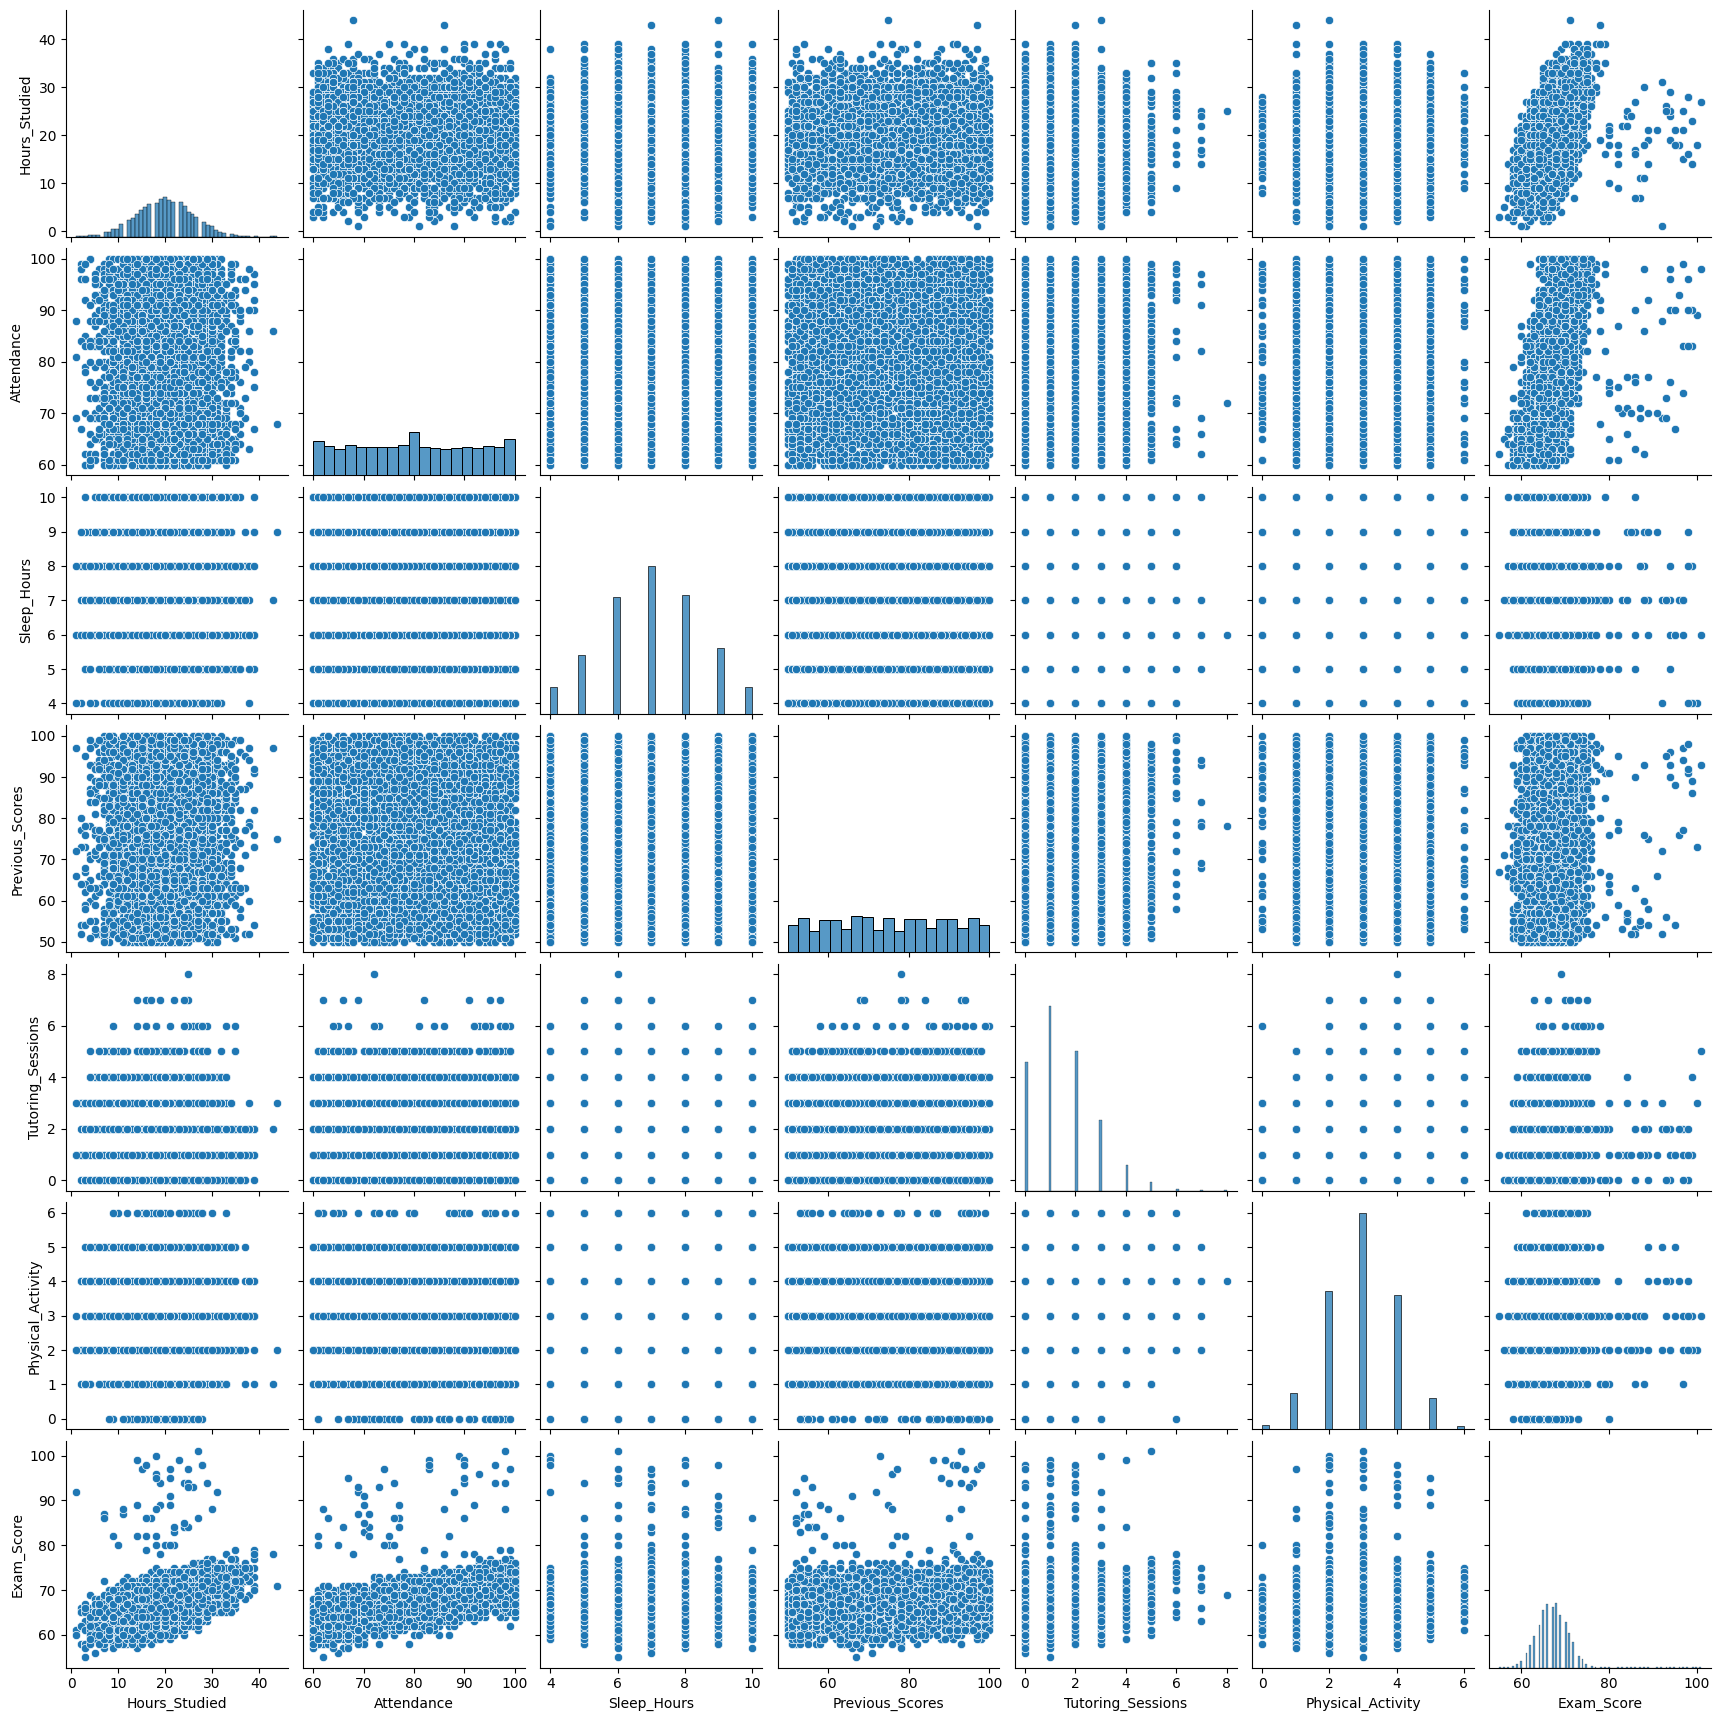

In [54]:
sns.pairplot(df)
plt.show()

**Step-4: Data-Cleaning**

- 1.Wrong data
- 2.Missing Values
- 3.Wrong datatypes
- 4.Duplicates
- 5.outliers


**1. wrong_data**

- wrong data is present in exam score

In [55]:
df['Exam_Score'].replace({101:100},inplace=True)
df['Exam_Score'].unique()

array([ 67,  61,  74,  71,  70,  66,  69,  72,  68,  65,  64,  60,  63,
        62, 100,  76,  79,  73,  78,  89,  75,  59,  86,  97,  83,  84,
        80,  58,  94,  55,  92,  82,  77,  88,  91,  99,  87,  57,  96,
        98,  95,  85,  93,  56], dtype=int64)

**2.Missing value**

In [56]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [57]:
# calculating percentage of missing values in data set
missing_persent =(df.isnull().sum()/len(df))*100
missing_persent
# as the missing value are less then 5% it is better if we replace them

Hours_Studied                 0.000000
Attendance                    0.000000
Parental_Involvement          0.000000
Access_to_Resources           0.000000
Extracurricular_Activities    0.000000
Sleep_Hours                   0.000000
Previous_Scores               0.000000
Motivation_Level              0.000000
Internet_Access               0.000000
Tutoring_Sessions             0.000000
Family_Income                 0.000000
Teacher_Quality               1.180566
School_Type                   0.000000
Peer_Influence                0.000000
Physical_Activity             0.000000
Learning_Disabilities         0.000000
Parental_Education_Level      1.362192
Distance_from_Home            1.014076
Gender                        0.000000
Exam_Score                    0.000000
dtype: float64

In [58]:
# as all the missing values are present categorical variable it is better if we replace them to most frequent value.
df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0],inplace = True)

df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0],inplace =True)

df['Distance_from_Home'].fillna(df['Distance_from_Home'].mode()[0],inplace = True)

**3-wrong datatype**

- No wrong datatype

**4-Duplicates**

In [59]:
df.duplicated().sum()
# no duplicates present

0

**5-outliers**

- we observed that there are outliers present in Hours_studied and exam scores

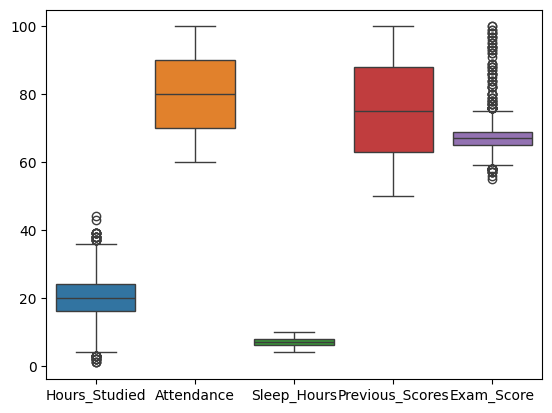

In [60]:
sns.boxplot(df[continuous])
plt.show()

In [61]:
q1 = df['Hours_Studied'].quantile(0.25)

q3 = df['Hours_Studied'].quantile(0.75)

IQR = q3 - q1

print('IQR',IQR)

l_bound = q1 - (1.5 * IQR)
u_bound = q3 + (1.5 * IQR)

outliers = df[(df['Hours_Studied']< l_bound) | (df['Hours_Studied'] > u_bound)]

print('Outliers below lower_limit:',len(df[df['Hours_Studied'] < l_bound]))

print('Outliers above upper_limit:',len(df[df['Hours_Studied'] > u_bound]))

outliers

IQR 8.0
Outliers below lower_limit: 21
Outliers above upper_limit: 22


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
209,43,86,High,Medium,Yes,7,97,Medium,Yes,2,Medium,High,Public,Positive,1,No,High School,Near,Female,78
262,1,69,High,Medium,Yes,6,97,Medium,Yes,1,Low,Medium,Public,Positive,3,No,High School,Near,Female,61
478,38,86,Low,High,Yes,7,79,Low,Yes,3,Low,Medium,Public,Negative,3,No,High School,Near,Male,73
1061,3,85,Low,High,No,8,73,Low,Yes,2,Low,Medium,Private,Neutral,3,No,High School,Near,Male,62
1101,3,62,Medium,Low,No,6,67,Medium,Yes,1,Low,Medium,Public,Negative,3,No,High School,Near,Male,55
1539,3,96,High,High,Yes,9,59,Medium,Yes,2,Low,Medium,Public,Negative,3,No,College,Moderate,Female,66
1591,2,84,Low,High,No,8,54,Low,Yes,3,Low,Low,Public,Positive,4,No,High School,Near,Male,62
1615,39,95,Medium,High,Yes,9,54,High,Yes,2,Medium,Medium,Private,Positive,3,No,High School,Moderate,Male,77
1957,39,97,High,High,Yes,10,91,Medium,Yes,2,Low,Medium,Public,Positive,3,No,High School,Moderate,Female,79
1971,2,96,Low,High,Yes,9,77,Medium,Yes,3,Medium,Medium,Public,Neutral,2,No,High School,Far,Female,65


- Note 
    - It is better to reconsider the outliers in the 'Hours_studied' feature,as the number of study hours can vary significantly between students.

In [62]:
# Exam_score
q1 = df['Exam_Score'].quantile(0.25)
q3 = df['Exam_Score'].quantile(.75)

IQR = q3 - q1 

l_bound = q1 - (1.5 * IQR)
u_bound = q3 + (1.5 * IQR)

outliers =df[(df['Exam_Score'] < l_bound) | (df['Exam_Score'] > u_bound)]

print("Outliers below lower limit",len(df[df['Exam_Score'] < l_bound]))

print('Outliers above lower limit',len(df[df['Exam_Score'] > u_bound]))

outliers

Outliers below lower limit 28
Outliers above lower limit 76


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
94,18,89,High,Medium,Yes,4,73,Medium,Yes,3,High,Medium,Private,Positive,2,No,College,Near,Female,100
106,31,100,Medium,Medium,No,7,59,Medium,Yes,2,High,High,Public,Positive,5,No,Postgraduate,Moderate,Male,76
113,35,99,High,High,Yes,7,85,Low,Yes,2,Medium,High,Private,Neutral,2,No,Postgraduate,Near,Female,79
209,43,86,High,Medium,Yes,7,97,Medium,Yes,2,Medium,High,Public,Positive,1,No,High School,Near,Female,78
217,19,70,Medium,Low,No,7,54,High,Yes,0,Medium,Medium,Public,Positive,2,Yes,High School,Moderate,Male,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6347,28,96,High,Low,Yes,4,98,High,Yes,1,High,High,Public,Positive,3,No,High School,Near,Male,98
6393,16,83,Low,Medium,Yes,8,92,Low,Yes,2,High,High,Public,Positive,4,No,Postgraduate,Near,Female,98
6431,4,60,Medium,Medium,Yes,7,55,Medium,Yes,2,Low,Medium,Private,Neutral,2,No,Postgraduate,Near,Male,58
6522,18,90,High,High,Yes,6,54,Low,Yes,1,Medium,High,Public,Negative,3,No,High School,Near,Female,95


- Note 
    - it is better to reconsider the outliers in the 'Exam_Score' feature ,as exam scores can vary significantly between students due to various factors.

**Q. Identify the most important factors that affect student performance?**

- Sol: For this lets check correlation which tells us the important features that affect student performance.

In [63]:
df[continuous].corr()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Exam_Score
Hours_Studied,1.000000,-0.009908,0.010977,0.024846,0.445558
Attendance,-0.009908,1.000000,-0.015918,-0.020186,0.581205
Sleep_Hours,0.010977,-0.015918,1.000000,-0.021750,-0.017000
Previous_Scores,0.024846,-0.020186,-0.021750,1.000000,0.175089
Exam_Score,0.445558,0.581205,-0.017000,0.175089,1.000000


In [64]:
df.groupby(['Internet_Access','Extracurricular_Activities','School_Type'])['Exam_Score'].describe().transpose()

Internet_Access                    No                                     \
Extracurricular_Activities         No                    Yes               
School_Type                   Private      Public    Private      Public   
count                       65.000000  132.000000  97.000000  205.000000   
mean                        66.138462   66.227273  66.731959   66.760976   
std                          3.344197    4.941785   3.389676    4.039807   
min                         58.000000   58.000000  59.000000   58.000000   
25%                         63.000000   63.750000  65.000000   64.000000   
50%                         66.000000   66.000000  66.000000   67.000000   
75%                         69.000000   68.000000  68.000000   69.000000   
max                         73.000000   93.000000  82.000000  100.000000   

Internet_Access                    Yes                                         
Extracurricular_Activities          No                       Yes               
School_Type                    Private       Public      Private       Public  
count                       755.000000  1717.000000  1092.000000  2544.000000  
mean                         67.169536    66.910891    67.487179    67.503931  
std                           3.719669     3.729596     3.984942     3.927477  
min                          56.000000    55.000000    57.000000    57.000000  
25%                          65.000000    64.000000    65.000000    65.000000  
50%                          67.000000    67.000000    67.000000    67.000000  
75%                          69.000000    69.000000    70.000000    70.000000  
max                          97.000000    97.000000   100.000000    99.000000

**Q1.How Hours_Studied related with Exam_Score?**

In [65]:
df['Hours_Studied'].corr(df['Exam_Score'])

0.4455575850232126

**Q2.Is attendance related with Exam_Score?**

In [66]:
df['Attendance'].corr(df['Exam_Score'])

0.5812045285301283

**Q3. Is there a minimum level of Attendence required to achieve a high Exam_Score?**

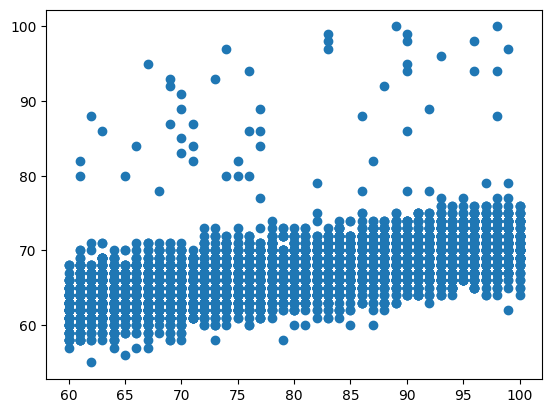

In [67]:
plt.scatter(x = df['Attendance'],y= df['Exam_Score'])
plt.show()

- Note 
    - we can say that a minimum attendence of 80 is good to gain good score in exams

**Q4.Does Parental_Involvement incrase scores of the students?**

In [68]:
df.groupby(df['Parental_Involvement'])['Exam_Score'].mean()

Parental_Involvement
High      68.092767
Low       66.357517
Medium    67.098156
Name: Exam_Score, dtype: float64

**Q5.Does students with high access to resources gain more marks compared to other?**

In [69]:
df.groupby(df['Access_to_Resources'])['Exam_Score'].mean()

Access_to_Resources
High      68.092152
Low       66.203351
Medium    67.134077
Name: Exam_Score, dtype: float64

**Q6.How extracurricular activities affect exam score?**

In [70]:
df.groupby(df['Extracurricular_Activities'])['Exam_Score'].agg(['mean','count'])

,mean,count
Extracurricular_Activities,,
No,66.931435,2669
Yes,67.441595,3938


**Q7.What is the relationship between Sleep_Hours and Exam_Score?**

In [71]:
df.groupby(df['Sleep_Hours'])['Exam_Score'].agg(['mean','count'])

,mean,count
Sleep_Hours,,
4,67.627832,309
5,67.297842,695
6,67.194041,1376
7,67.242964,1741
8,67.218728,1399
9,67.149677,775
10,67.137821,312


**Q8.Is there an optimal number of sleep_hours for maximizing Exam_Score?**

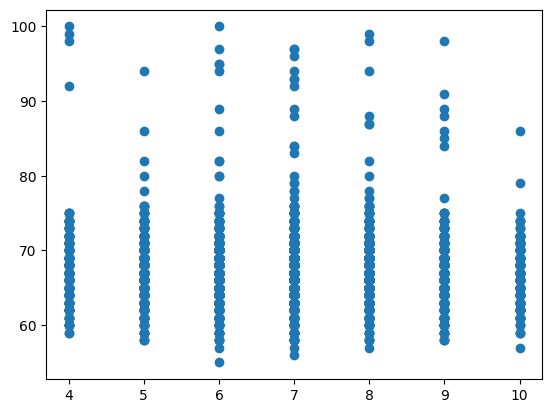

In [72]:
plt.scatter(x=df['Sleep_Hours'],y = df['Exam_Score'])
plt.show()

**Q9.Is there any change in average score of students in previous and present exams?**

In [73]:
df[['Previous_Scores','Exam_Score']].describe()

,Previous_Scores,Exam_Score
count,6607.000000,6607.000000
mean,75.070531,67.235508
std,14.399784,3.889161
min,50.000000,55.000000
25%,63.000000,65.000000
50%,75.000000,67.000000
75%,88.000000,69.000000
max,100.000000,100.000000


**Q10.How much is previous_Scores related to Exam_Scores?**

In [74]:
df['Previous_Scores'].corr(df['Exam_Score'])

0.17508889951329237

**Q11.how does Motivation_Level correlate with Exam_score?**

In [75]:
df.groupby("Motivation_Level")['Exam_Score'].mean()

Motivation_Level
High      67.704321
Low       66.751678
Medium    67.330648
Name: Exam_Score, dtype: float64

**Q12. Does having high inrernet access impact good exam_score?**

In [76]:
df.groupby('Internet_Access')['Exam_Score'].mean()

Internet_Access
No     66.533066
Yes    67.292895
Name: Exam_Score, dtype: float64

**Q13. How do Tutoring_Sessions affect Exam_Score?**

In [77]:
df.groupby(df['Tutoring_Sessions'])['Exam_Score'].mean()

Tutoring_Sessions
0    66.489755
1    66.980266
2    67.567010
3    67.894737
4    68.229236
5    69.058252
6    71.666667
7    69.857143
8    69.000000
Name: Exam_Score, dtype: float64

**Q14.Is there a relationship between Family_Income and Exam_Score?**

In [78]:
df.groupby(df['Family_Income'])['Exam_Score'].mean()

Family_Income
High      67.841608
Low       66.848428
Medium    67.334959
Name: Exam_Score, dtype: float64

**Q15.Do students from higher-income families perform better in exams?**

- Note:
    - For this we can say that yes there is slight increase in the  performance of students in exams with higher income families compared to others.

**Q16- How does teacher_quality influence exam_scores?**

In [79]:
df.groupby(df['Teacher_Quality'])['Exam_Score'].mean()

Teacher_Quality
High      67.676425
Low       66.753425
Medium    67.100175
Name: Exam_Score, dtype: float64

**Q17-Does school type affect exam scores?**

In [80]:
df.groupby(df['School_Type'])['Exam_Score'].mean()

School_Type
Private    67.287705
Public     67.212701
Name: Exam_Score, dtype: float64

**Q18- How does Peer_Influence impact Ecam_Score?**

In [81]:
df.groupby(df['Peer_Influence'])['Exam_Score'].mean()

Peer_Influence
Negative    66.564270
Neutral     67.197917
Positive    67.622820
Name: Exam_Score, dtype: float64

**Q19- Is there ralation between physical_activity and Exam_Score?**

In [82]:
df.groupby(df['Physical_Activity'])['Exam_Score'].mean()

Physical_Activity
0    67.521739
1    66.969121
2    67.185003
3    67.195678
4    67.313016
5    67.603878
6    68.093750
Name: Exam_Score, dtype: float64

**Q20-Does learning disabilities affect ecam_score?**

In [83]:
df.groupby(df['Learning_Disabilities'])['Exam_Score'].mean()

Learning_Disabilities
No     67.348951
Yes    66.270504
Name: Exam_Score, dtype: float64

**Q21- Does Parental_education affect exam_score?**

In [84]:
df.groupby(df["Parental_Education_Level"])['Exam_Score'].mean()

Parental_Education_Level
College         67.315737
High School     66.897676
Postgraduate    67.970881
Name: Exam_Score, dtype: float64

**Q22-Does distance from home to school affect exam_score?**

In [85]:
df.groupby(df['Distance_from_Home'])['Exam_Score'].mean()

Distance_from_Home
Far         66.457447
Moderate    66.980981
Near        67.493799
Name: Exam_Score, dtype: float64

**Q23- Do male and female students perform better in exams?**

In [86]:
df.groupby('Gender')['Exam_Score'].mean()

Gender
Female    67.244540
Male      67.228894
Name: Exam_Score, dtype: float64

**Q24- what is the influence of family income on Tutoring sessions?**

In [87]:
df.groupby(df['Family_Income'])['Tutoring_Sessions'].mean()

Family_Income
High      1.505122
Low       1.487650
Medium    1.494374
Name: Tutoring_Sessions, dtype: float64

**Q25-Does Internet access and Access to resources help students to gain more marks?**

In [88]:
df.groupby(['Internet_Access','Access_to_Resources'])['Exam_Score'].mean()


Internet_Access  Access_to_Resources
No               High                   66.987179
                 Low                    65.056180
                 Medium                 66.771654
Yes              High                   68.186916
                 Low                    66.286765
                 Medium                 67.164111
Name: Exam_Score, dtype: float64

**Q26- Are Hours studied and Attendance correlated with exam score?**

In [89]:
df[['Hours_Studied','Attendance','Exam_Score']].corr()

,Hours_Studied,Attendance,Exam_Score
Hours_Studied,1.000000,-0.009908,0.445558
Attendance,-0.009908,1.000000,0.581205
Exam_Score,0.445558,0.581205,1.000000


**Q27-What is the ralation between access to resources and Family_income?**

In [90]:
pd.crosstab(df['Access_to_Resources'],df['Family_Income'])

Family_Income,High,Low,Medium
Access_to_Resources,,,
High,381,831,763
Low,238,533,542
Medium,650,1308,1361


**Q28.Does distance from school affect attendance?**

In [91]:
df.groupby('Distance_from_Home')['Attendance'].mean()

Distance_from_Home
Far         79.436170
Moderate    79.854354
Near        80.129841
Name: Attendance, dtype: float64

**Q29- Which schools(School_Type) have the higest average Exam_Score?**

In [92]:
df.groupby(df['School_Type'])['Exam_Score'].mean()

School_Type
Private    67.287705
Public     67.212701
Name: Exam_Score, dtype: float64

**Q30- What is the distribution of Hours_Studied among students who scored above 90 in Exam_Score?**

In [93]:
x= df[df['Exam_Score']>90]
x

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
94,18,89,High,Medium,Yes,4,73,Medium,Yes,3,High,Medium,Private,Positive,2,No,College,Near,Female,100
529,15,83,Medium,Medium,No,7,97,Medium,Yes,2,Low,High,Private,Neutral,2,No,High School,Near,Female,97
770,24,96,Low,High,No,6,93,Medium,Yes,2,Low,Medium,Public,Neutral,2,No,High School,Moderate,Female,94
836,29,76,Medium,Medium,No,8,96,Low,Yes,2,Low,Medium,Public,Positive,2,No,Postgraduate,Moderate,Male,94
919,21,74,High,Medium,No,6,94,Medium,Yes,1,Low,High,Public,Positive,1,No,High School,Near,Male,97
1109,31,69,Medium,Medium,No,7,52,Medium,No,2,High,Low,Public,Neutral,5,No,College,Far,Male,92
1525,27,98,Low,Medium,Yes,6,93,Low,No,5,High,High,Public,Positive,3,No,High School,Moderate,Female,100
2292,21,70,High,High,No,9,66,Medium,Yes,1,Medium,Low,Public,Neutral,4,No,College,Moderate,Male,91
2425,23,83,High,High,Yes,4,89,Low,Yes,1,Medium,Medium,Public,Negative,3,No,High School,Far,Male,99
3124,19,90,Medium,High,Yes,5,90,Low,Yes,0,Low,Medium,Public,Neutral,2,No,College,Far,Female,94


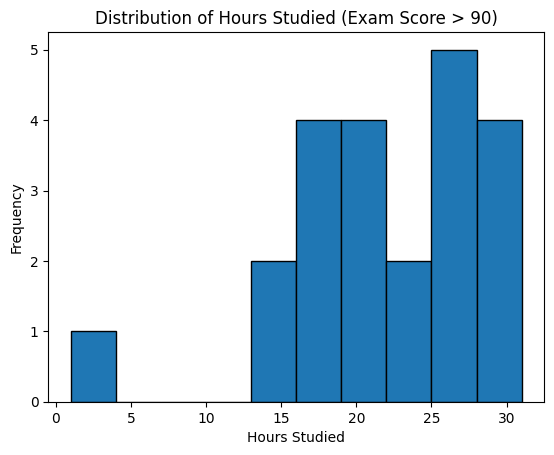

In [94]:
plt.hist(x['Hours_Studied'],bins = 10,edgecolor = 'Black')
plt.xlabel('Hours Studied')
plt.ylabel('Frequency')
plt.title('Distribution of Hours Studied (Exam Score > 90)')
plt.show()

**Q31- what is the probability of students gaining marks above 80 in exam withour tutoring sesssions?**

In [95]:
x = df[(df['Tutoring_Sessions']==0)]
x

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
8,17,94,Medium,High,No,6,80,High,Yes,0,Medium,Low,Private,Neutral,1,No,College,Near,Male,69
9,23,98,Medium,Medium,Yes,8,71,Medium,Yes,0,High,High,Public,Positive,5,No,High School,Moderate,Male,72
16,14,60,Medium,Low,Yes,10,65,Low,Yes,0,High,Medium,Private,Positive,3,No,College,Near,Male,60
20,29,78,Medium,Medium,No,5,99,High,Yes,0,High,Medium,Public,Negative,1,No,High School,Moderate,Female,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6590,19,70,Medium,Medium,Yes,7,95,High,No,0,Medium,High,Private,Positive,3,No,College,Near,Female,66
6592,29,100,Medium,Low,Yes,8,100,Low,Yes,0,Low,Medium,Private,Neutral,5,Yes,High School,Near,Male,72
6593,16,75,High,Low,Yes,10,53,High,Yes,0,Low,Low,Public,Positive,4,No,College,Near,Female,64
6597,16,91,High,Medium,Yes,6,72,High,Yes,0,High,High,Public,Negative,2,No,Postgraduate,Near,Female,70


In [96]:
x1=x[x['Exam_Score']>80]
x1

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
217,19,70,Medium,Low,No,7,54,High,Yes,0,Medium,Medium,Public,Positive,2,Yes,High School,Moderate,Male,89
2954,14,75,Medium,Medium,Yes,5,95,Medium,Yes,0,Medium,Medium,Public,Positive,3,No,College,Moderate,Male,82
3124,19,90,Medium,High,Yes,5,90,Low,Yes,0,Low,Medium,Public,Neutral,2,No,College,Far,Female,94
3141,7,63,High,High,Yes,10,90,Medium,Yes,0,Low,Medium,Private,Positive,2,Yes,High School,Moderate,Male,86
3364,16,76,Medium,High,Yes,6,63,High,Yes,0,Low,Medium,Public,Positive,1,No,High School,Near,Female,86
4192,28,90,Low,Medium,Yes,9,91,Medium,Yes,0,Medium,Medium,Public,Positive,2,No,College,Moderate,Female,98
4531,26,69,High,High,No,7,95,Low,No,0,Medium,Medium,Public,Negative,3,No,Postgraduate,Near,Female,93
5966,25,99,Medium,Medium,Yes,7,77,Medium,Yes,0,High,High,Public,Neutral,3,No,High School,Near,Male,97


In [97]:
prob = len(x1)/len(x)
prob

0.005287508261731659

**Q32- Are peer_influence and Motivation_level dependent on each other?**

**chi-square test**


    - H0 : Peer_Influence and Motivation_Level are independent 
    - H1 : Peer_Influence and Motivation_Level are dependent
    - alpha = 0.05

In [98]:
x = pd.crosstab(df['Peer_Influence'],
               df['Motivation_Level'])
x

Motivation_Level,High,Low,Medium
Peer_Influence,,,
Negative,286,417,674
Neutral,500,737,1355
Positive,533,783,1322


In [99]:
from scipy import stats
chisquare_test = stats.chi2_contingency(x)
chisquare_test

Chi2ContingencyResult(statistic=4.644346523492719, pvalue=0.3257731182930861, dof=4, expected_freq=array([[ 274.89980324,  403.7004692 ,  698.39972756],
       [ 517.45845316,  759.90676555, 1314.63478129],
       [ 526.64174361,  773.39276525, 1337.96549115]]))

**Q33. what is the probability of getting marks more than 80 with less motivation_level?**

In [100]:
low_motivation = df[df['Motivation_Level'] == 'Low']
low_motivation

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,Low,Medium,Private,Neutral,2,No,High School,Moderate,Male,67
11,17,97,Medium,High,Yes,6,87,Low,Yes,2,Low,High,Private,Neutral,2,No,High School,Near,Male,71
12,21,83,Medium,Medium,Yes,8,97,Low,Yes,2,Medium,Medium,Public,Positive,4,No,High School,Near,Male,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6595,28,78,Medium,High,No,7,92,Low,Yes,1,Medium,High,Public,Positive,3,No,Postgraduate,Moderate,Female,71
6596,17,92,Medium,Medium,No,7,66,Low,Yes,2,Low,Medium,Public,Negative,3,No,High School,Near,Male,66
6599,30,94,Medium,Low,No,5,52,Low,No,3,High,Medium,Private,Neutral,2,No,Postgraduate,Moderate,Female,70
6601,20,83,Medium,Low,No,6,51,Low,Yes,2,Medium,Medium,Public,Neutral,4,No,High School,Moderate,Female,65


In [101]:
high_marks = low_motivation[low_motivation['Exam_Score']>80]
prob = len(high_marks)/ len(low_motivation)
prob

0.005678884873515746

**Q34- what is the probability that students who do not participate in extracurricular activity gain scores more than 80?**

In [102]:
no_extracurricular = df[df['Extracurricular_Activities']=='No']

high_score = no_extracurricular[no_extracurricular['Exam_Score']>80]

prob = len(high_score)/ len(no_extracurricular)
prob

0.005245410266017235

**Q35- How does the average Exam_Score differ between male and female students across different School_Type?**

In [103]:
df.groupby(['Gender','School_Type'])['Exam_Score'].mean()

Gender  School_Type
Female  Private        67.300119
        Public         67.220513
Male    Private        67.278731
        Public         67.206949
Name: Exam_Score, dtype: float64